<h1>Importing Libraries</h1>

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report


nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

<h1>Data Collection</h1>

In [38]:
df = pd.read_csv("spam.csv", header=None, encoding='latin1')
df.head()


,0,1,2,3,4
0,v1,v2,NaN,NaN,NaN
1,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
2,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
4,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


<h1>Data Cleaning</h1>

In [41]:

df = df.rename(columns={0: 'label', 1: 'message'})
df.head()



,label,message,2,3,4
0,v1,v2,NaN,NaN,NaN
1,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
2,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
3,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
4,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN


In [43]:
df.describe()

,label,message,2,3,4
count,5573,5573,50,12,6
unique,3,5170,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [42]:

spam_count = df['label'].value_counts().get('spam', 0)
ham_count = df['label'].value_counts().get('ham', 0)

print(f"Number of Spam messages: {spam_count}")
print(f"Number of Ham messages: {ham_count}")


Number of Spam messages: 747
Number of Ham messages: 4825


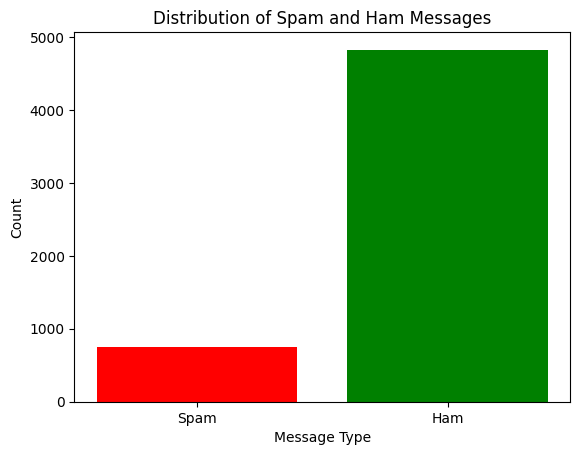

In [45]:
plt.bar(['Spam', 'Ham'], [spam_count, ham_count], color=['red', 'green'])
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.show()

In [49]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


def clean_and_tokenize(text):
   
    text = ''.join([char for char in text if char not in string.punctuation and not char.isdigit()])
    
    tokens = word_tokenize(text)
    
 
    tokens = [word.lower() for word in tokens]
  
    tokens = [word for word in tokens if word not in stop_words]

    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    return ' '.join(tokens)

df['message'] = df['message'].apply(clean_and_tokenize)


df.head()

,label,message,2,3,4
0,v1,v,NaN,NaN,NaN
1,ham,go jurong point crazy available bugis n great ...,NaN,NaN,NaN
2,ham,ok lar joking wif u oni,NaN,NaN,NaN
3,spam,free entry wkly comp win fa cup final tkts st ...,NaN,NaN,NaN
4,ham,u dun say early hor u c already say,NaN,NaN,NaN


<h1>Data Splitting</h1>

In [50]:

X = df['message']
y = df['label']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape: (4458,) (4458,)
Testing set shape: (1115,) (1115,)


<h1>Model Training</h1>

In [53]:
model = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)), 
    ('classifier', LogisticRegression())
])

model.fit(X_train, y_train)

predictions = model.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy:.2%}")

print("Classification Report:")
print(classification_report(y_test, predictions))

Accuracy: 97.04%
Classification Report:
              precision    recall  f1-score   support

         ham       0.97      1.00      0.98       964
        spam       0.97      0.81      0.88       151

    accuracy                           0.97      1115
   macro avg       0.97      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115



<h1>Data visualization</h1>

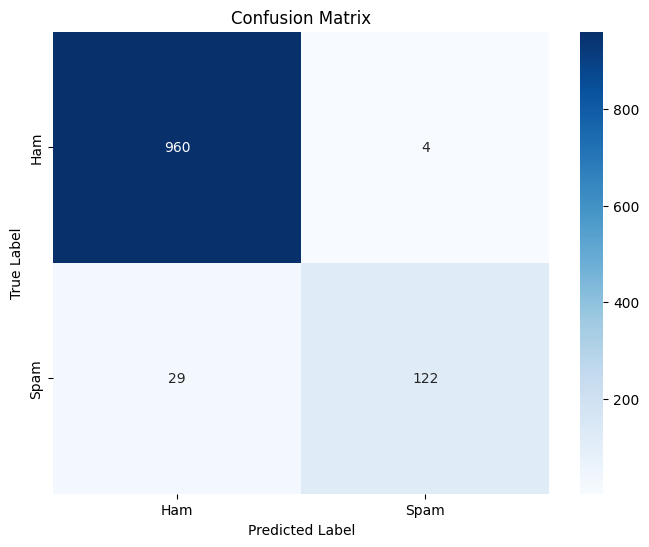

In [60]:
conf_matrix = confusion_matrix(y_test, predictions)


plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()